Import the libraries. For all the dependencies look at the installation file

In [1]:
from splash.target import Target
from splash.algorithm import GeneralTransitSearch



In [2]:
#Let's download the data from cambridge server. Thanks to function written by Peter.
from splash.download import cambridge_download_product


#Please use the username and password provided by Peter to download the data.
username="*********"
password="*********"
Target="Sp0026-5428"

#They will be saved in folder named data
#cambridge_download_product(".", username, password, target=Target)

100%|██████████| 28/28 [00:41<00:00,  1.48s/it]


In [7]:
#Version=0 --->SNO format data txt file. Headers expected in certain format.
#Version=1--->Old Cambridge Pipeline fits file
#Version=2--->Not yet implemented

#Target1 = Target(Location="data", Name="EPIC249631677b", Output="249631677b", version=0)
#print(Target1.TotalObservationHours)

#To run speculoos target data you just downloaded
Target2 = Target(Location="data", Name="Sp0026-5428", Output="Sp0026-5428", version=1)


##Precleaning the data
#Remove Column 1 just uses sigma clipping using flux
#Column -1 uses all of the available columns of data
Target1.PreClean(CutOff=7.5, NIter=2, Columns=-1, MinDataCount=50, SavePlot=False, ShowPlot=False)



TypeError: 'str' object is not callable

In [ ]:
SVDSearch = GeneralTransitSearch()


#This requires creating SearchParams.config file locally that determine the parameters for location.
#The values are from SearchParams.config can be overriden here.

SVDSearch.transitSearchParam['TStepSize'] = 5.0 #in Minutes
SVDSearch.transitSearchParam['TDurStepSize'] = 5.0 #in Minutes
SVDSearch.transitSearchParam['NCPUS'] = -1 #Use as many cores as available


#Run the detrending, TLS and transit pairing algorithm
SVDSearch.Run(Target1, ShowPlot=False, SavePlot=True)
SVDSearch.PeriodicSearch(Target1, method="TLS", ShowPlot=True)
SVDSearch.PeriodicSearch(Target1, method="TransitPair", ShowPlot=True)


  0%|          | 0/270 [00:00<?, ?it/s]

Detrending basis vectors...
FWHM
FWHM_X
FWHM_Y
SKY
AIRMASS
Running 1 Night


  0%|          | 0/1199 [00:00<?, ?it/s]

Running 2 Night


 55%|█████▍    | 655/1199 [02:28<01:49,  4.95it/s]

100%|██████████| 5000/5000 [01:05<00:00, 76.57it/s]


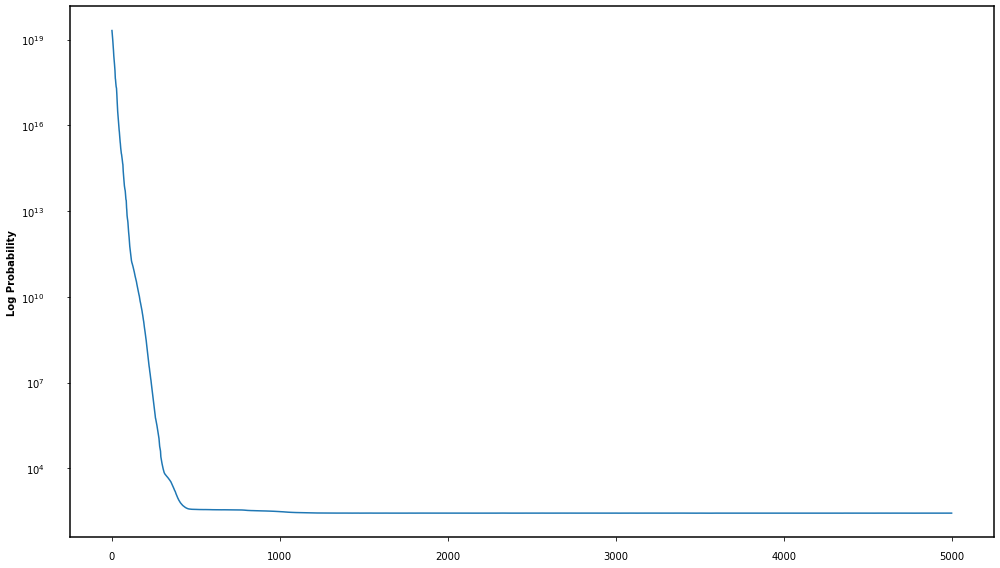

Saving result from the first MCMC result


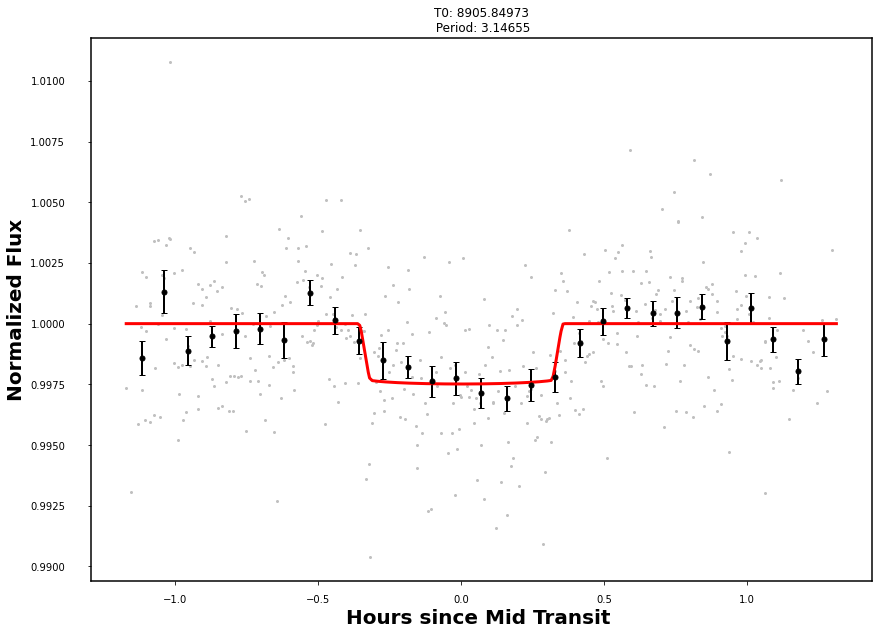

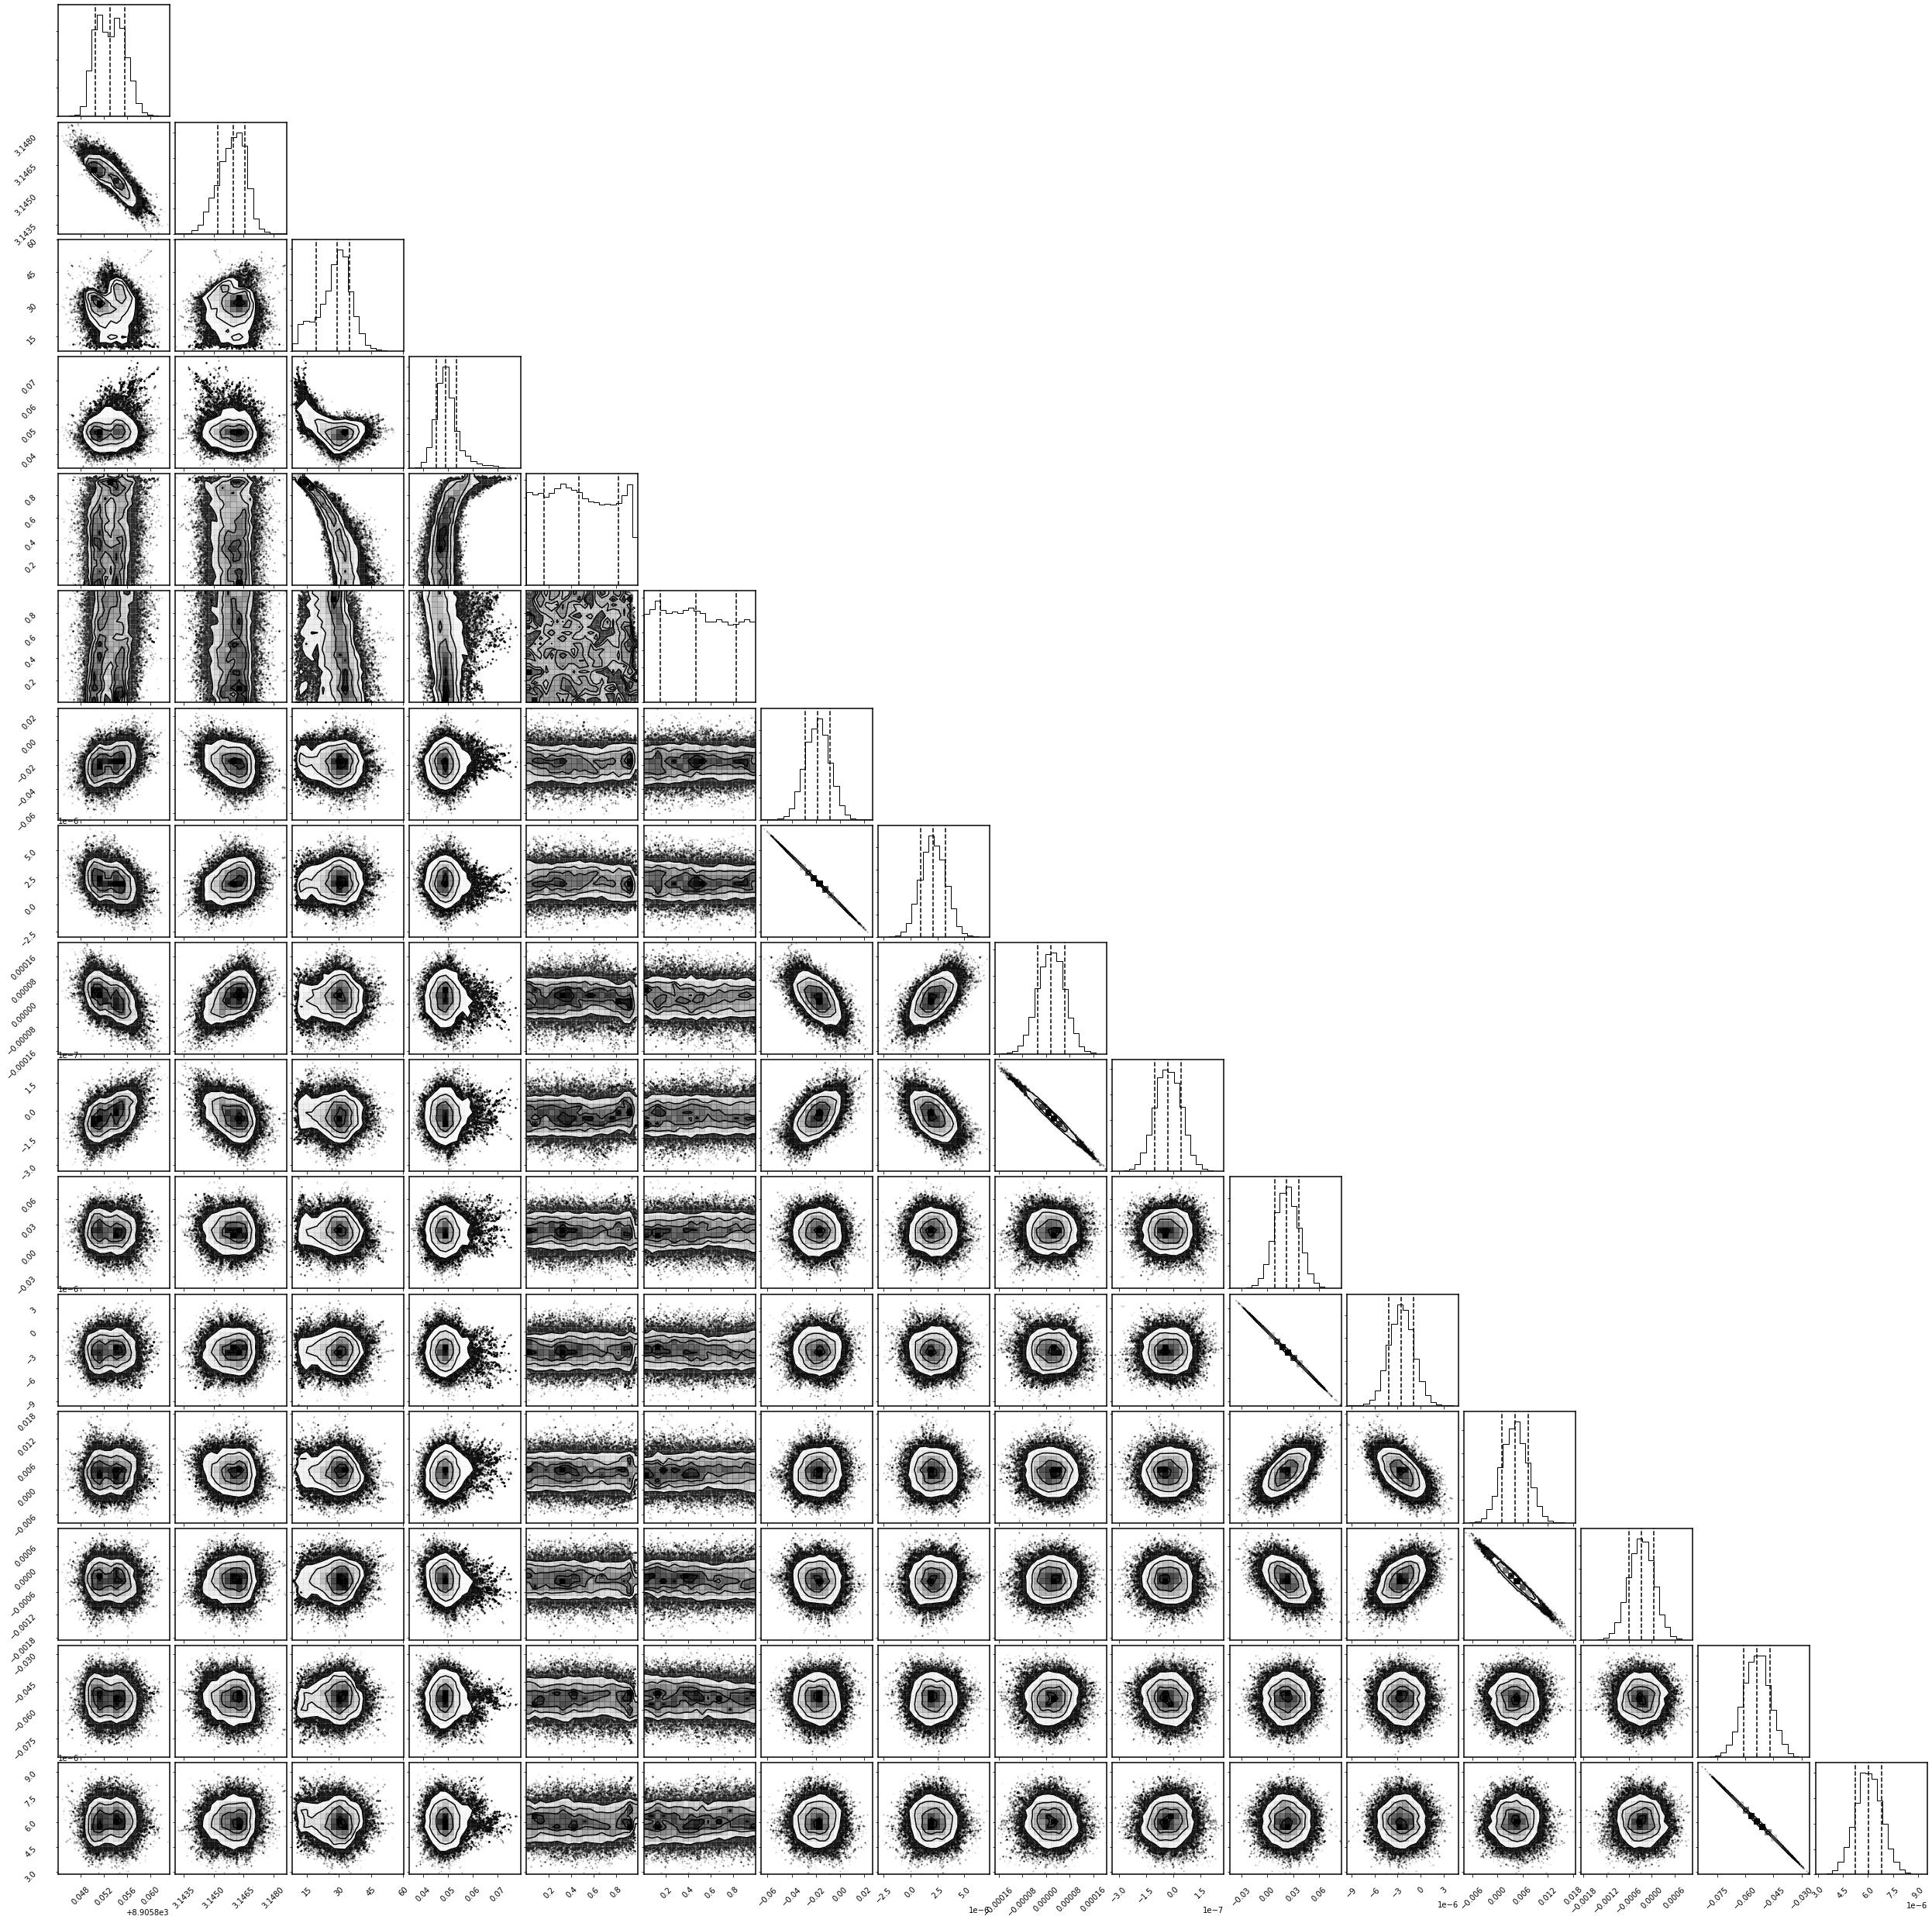

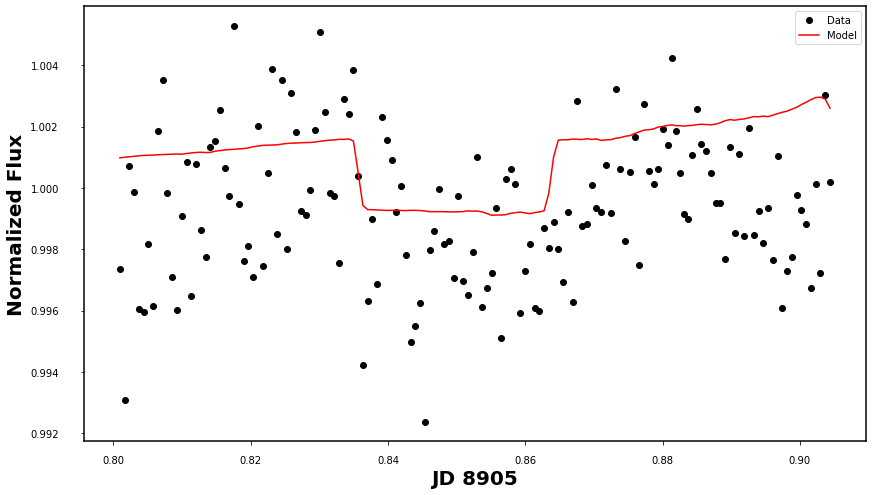

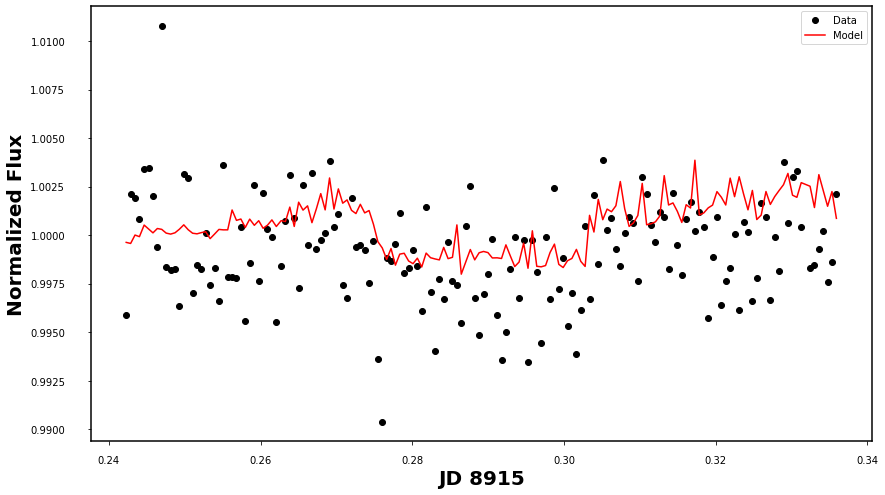

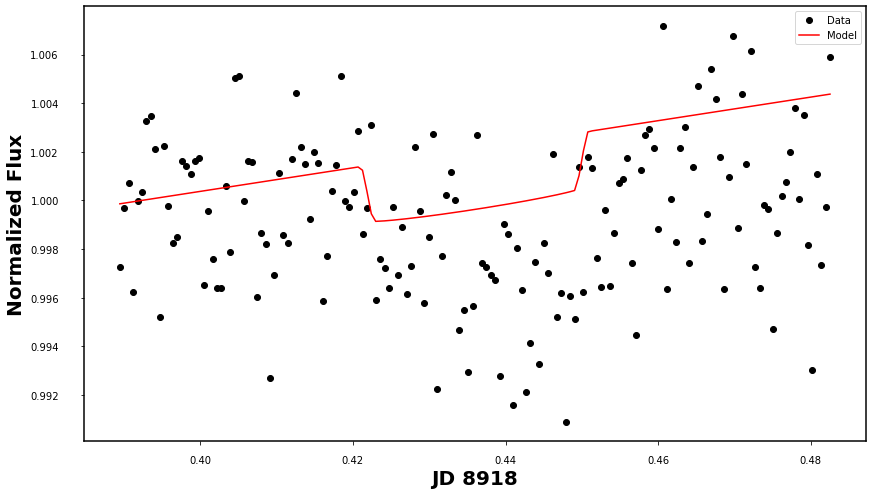

MCMC Run completed


In [4]:
#Now run MCMC using transit pairing as prior.
from splash.sampler import TransitFit

#Let us fit for the top 2.
TransitFit(Target1, SVDSearch, NRuns=5000, NumFits=2, TDur=2.5, Tolerance=0.035, ShowPlot=True)